# We will learn about debugging in jupyter notebook and python

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [7]:

def plot_data_frame(df):
    for col in df.columns:
        df[col].plot()
    

In [8]:
df = pd.DataFrame({'x' : [1, 2, 3, 4], 'y' : [4, 5, 6, 7]})
df

,x,y
0,1,4
1,2,5
2,3,6
3,4,7


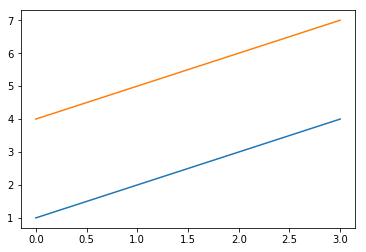

In [9]:
plot_data_frame(df)

In [5]:
%debug

> <ipython-input-2-faa836915f2c>(4)plot_data_frame()
      1 
      2 def plot_data_frame(df):
      3     for col in df.columns:
----> 4         df[x].plot()
      5 

ipdb> col
'x'
ipdb> q


In [20]:
from IPython.core.debugger import set_trace

In [25]:
def build_summary(x):
    '''
     build the minimun , maximum and number of unique item summary
     args
     x: 1-d numy array
     returns [] of minimun , maximum and number of unique item summary    
    '''
    #set_trace()
    unique_item = np.unique(x) # @TODO. Hint - recall from numpy how to find unique items.
    item_num = len(unique_item)
    return x.min(), x.max(), item_num
    

In [14]:
a = np.array([1, 3 ,5 ,6 ,5 , 8, 1])

## use assertion to test output of a function

In [26]:
min_val, max_val, unique_item_num = build_summary(a)

<font color='red'>  assertion regarding max will fail  </font> and we need to debug original function build_smmary using
**set_trace imported as from IPython.core.debugger import set_trace**

*Also see how we got red color in the text. **We can use html tags in markdown !!!** *

In [27]:

assert min_val == 1, "min val must be 1"
assert max_val == 8, "max val must be 8"
assert unique_item_num == 5 , "unique item must be 5"

In [ ]:
print(build_summary(a))

Also see how doc string are used for generating function help when using **? in function signature**

In [28]:
build_summary?

# A more complex debugging scenario
# But first some pandas review

**We will also learn how to apply function to pandas data frame or Series**

In [29]:
# number of  sunny days
frame = pd.DataFrame(np.arange(10, 10+12).reshape(4,3), columns=['Jan','Feb' ,'March'],
                      index=['Washington', 'Ohio', 'Texas', 'Colorado'])
frame

,Jan,Feb,March
Washington,10,11,12
Ohio,13,14,15
Texas,16,17,18
Colorado,19,20,21


If we want to find maximum sunny days  during  Jan, Feb and March in any state then we

use **apply** function on dataframe and it work on each columns(Series)

In [31]:
def find_max(x):
    return x.max()
frame.apply(find_max)

Jan      19
Feb      20
March    21
dtype: int64

What if we are insterested in **miminum and maximium** sunny days in each state not across the state

In [33]:
frame.apply(lambda x: [x.min(), x.max()], axis=1)

Washington    [10, 12]
Ohio          [13, 15]
Texas         [16, 18]
Colorado      [19, 21]
dtype: object

To do elementwise operation use
- **applymap** for dataFrame
- **map** for Series

**Let say we want to add 1 to each element after realizing that our sensor reading started from 0 for first sunny day**

In [34]:
print(frame)
print(frame.applymap(lambda x: x + 1))

            Jan  Feb  March
Washington   10   11     12
Ohio         13   14     15
Texas        16   17     18
Colorado     19   20     21
            Jan  Feb  March
Washington   11   12     13
Ohio         14   15     16
Texas        17   18     19
Colorado     20   21     22


### Side: Do you remember map  build in function in python(apply a function to sequence) to avoid for loop

In [36]:
x_list = [1, 2, 4 ,6]
result = []
for item in x_list:
    result.append(item**2)

print(list(map(lambda x:x**2 ,x_list)))
print(result)

[1, 4, 16, 36]
[1, 4, 16, 36]


*Note: this list can be functions*

In [37]:
funcs = [lambda x:x**2, lambda x:x**3]
for i in range(4):
    print(list(map(lambda a:a(i), funcs)))

[0, 0]
[1, 1]
[4, 8]
[9, 27]


Let say we want to do correction in a dataframe and apply a couple of function to each of the columns of new dataFrame and return list of modified datFrame

Following excecise will help us in
- how to put break point(**set_trace or type b function name or line numnber**)
- how to check values
- how execute current line in debug mode (**type n and enter**)
- how to go insize function if current line is a function all(**type s**)
- how to get out of a current function if we do not want to debug further in current function (**press return**)
- how to go back to previous function call location(frame) (**type up**)
- how to go next function call if we have come down in function call stack (**type down**)

In [38]:
frame

,Jan,Feb,March
Washington,10,11,12
Ohio,13,14,15
Texas,16,17,18
Colorado,19,20,21


In [46]:
def apply_functions(df, funcs):
    results = []
    for func in funcs:
        results.append( df.apply(func))
        #print(df.apply(func))
    return results    
    
def apply_functions_with_correction(df, error_cor = 1, functions_to_apply = []):
    #set_trace()
    corrected_df = df.applymap(lambda x: x+error_cor)    
    return apply_functions(corrected_df, functions_to_apply)

In [47]:
results = apply_functions_with_correction(frame, error_cor= 2, functions_to_apply= [lambda x:x.max(), lambda x:x.min()])

In [48]:
for r in results:
    print(r)

Jan      21
Feb      22
March    23
dtype: int64
Jan      12
Feb      13
March    14
dtype: int64


One more useful debug command (**until**) if handling a loop like list or dictionary comphrehension.
Typing untill at last statement in loop will run all the loop and go to next line

**Write a function to calculate the product of square of even number in a list?**

Also use reduce from functools

In [56]:
from functools import reduce
def calculate_product_of_square(x):
    result = []
    set_trace()
    for item in x:
        if item%2 == 0:
            result.append(item**2)
    return reduce(lambda a,b: a*b, result)        
    

In [57]:
assert calculate_product_of_square(list(range(1, 6))) == 64, "product of square of even numbers in [1 ,2 ,3, 4, 5] must be 64"

> <ipython-input-56-1b3f62588dba>(5)calculate_product_of_square()
      3     result = []
      4     set_trace()
----> 5     for item in x:
      6         if item%2 == 0:
      7             result.append(item**2)

ipdb> n
> <ipython-input-56-1b3f62588dba>(6)calculate_product_of_square()
      4     set_trace()
      5     for item in x:
----> 6         if item%2 == 0:
      7             result.append(item**2)
      8     return reduce(lambda a,b: a*b, result)

ipdb> item
1
ipdb> n
> <ipython-input-56-1b3f62588dba>(5)calculate_product_of_square()
      3     result = []
      4     set_trace()
----> 5     for item in x:
      6         if item%2 == 0:
      7             result.append(item**2)

ipdb> n
> <ipython-input-56-1b3f62588dba>(6)calculate_product_of_square()
      4     set_trace()
      5     for item in x:
----> 6         if item%2 == 0:
      7             result.append(item**2)
      8     return reduce(lambda a,b: a*b, result)

ipdb> n
> <ipython-input-56-1b3f62588dba>

BdbQuit: 

# How to organize the code

- keep the notebook in main repository directory
- add an empty file __init__.py in main repository directory and any new directory
- import code using relative path and . notation

As an example
- create code directory inside current directory where the notebook is running from
- add __init__.py in current and code
- create a function  with following code in **utils.py** file inside code directory

This function calcualate sum and product of 1d numpy array
 def calculate_sum_and_product(x):


    return x.sum(), x.prod()

- import the code in notebook as from code.utils import calculate_sum_and_product
- Now we can use this function in the notebook



### Let test above function  on following array

In [ ]:
import numpy as np
x = np.array([1 ,2 ,3, 4])


if you change the code in utils.py, its will not be refleted in notebook.


Put following at the start of notebook to allow
auto reload

%load_ext autoreload 

%autoreload 2 

